In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans  
from yellowbrick.cluster import KElbowVisualizer


In [5]:
data =pd.read_excel('ecom customer_data.xlsx', engine='openpyxl')
data


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [23]:
df=data.copy()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [25]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [26]:
df[df.duplicated()]

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft


In [27]:
df.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [28]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [29]:
df.isna().sum().sum()

np.int64(0)

In [30]:
df.Gender.value_counts()

Gender
F    24778
M     5222
Name: count, dtype: int64

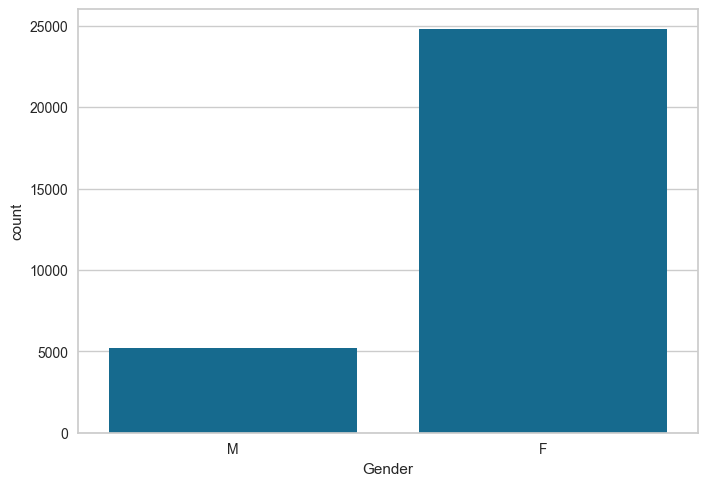

In [31]:
sns.countplot(data=df,x='Gender')
plt.show()

<Axes: xlabel='Orders', ylabel='count'>

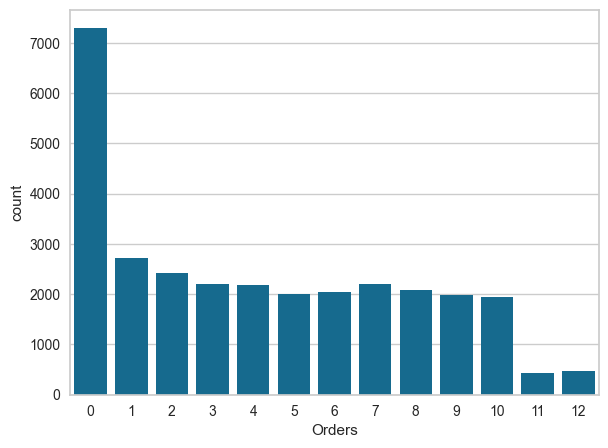

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='Orders')

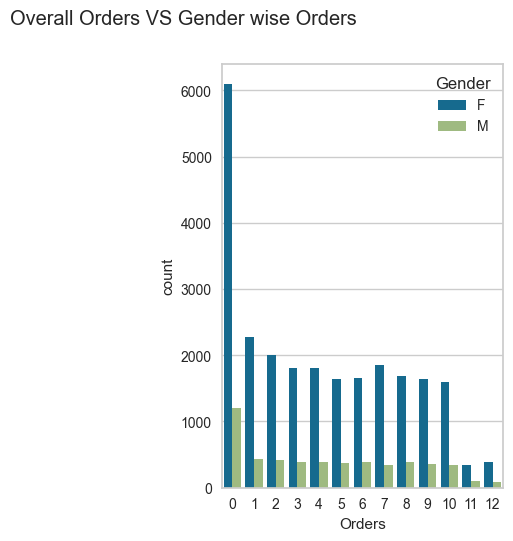

In [33]:
plt.subplot(1,2,2)
sns.countplot(data=df,x='Orders',hue='Gender')
plt.suptitle("Overall Orders VS Gender wise Orders")
plt.show()

In [34]:
cols=list(df.columns[2:])
def dist_list(lst):
    plt.figure(figsize=(30,30))
    for i,col in enumerate(lst,1):
        plt.subplot(6,6,i)
        sns.boxplot(data=df,x=df[col])
        dist_list(cols)

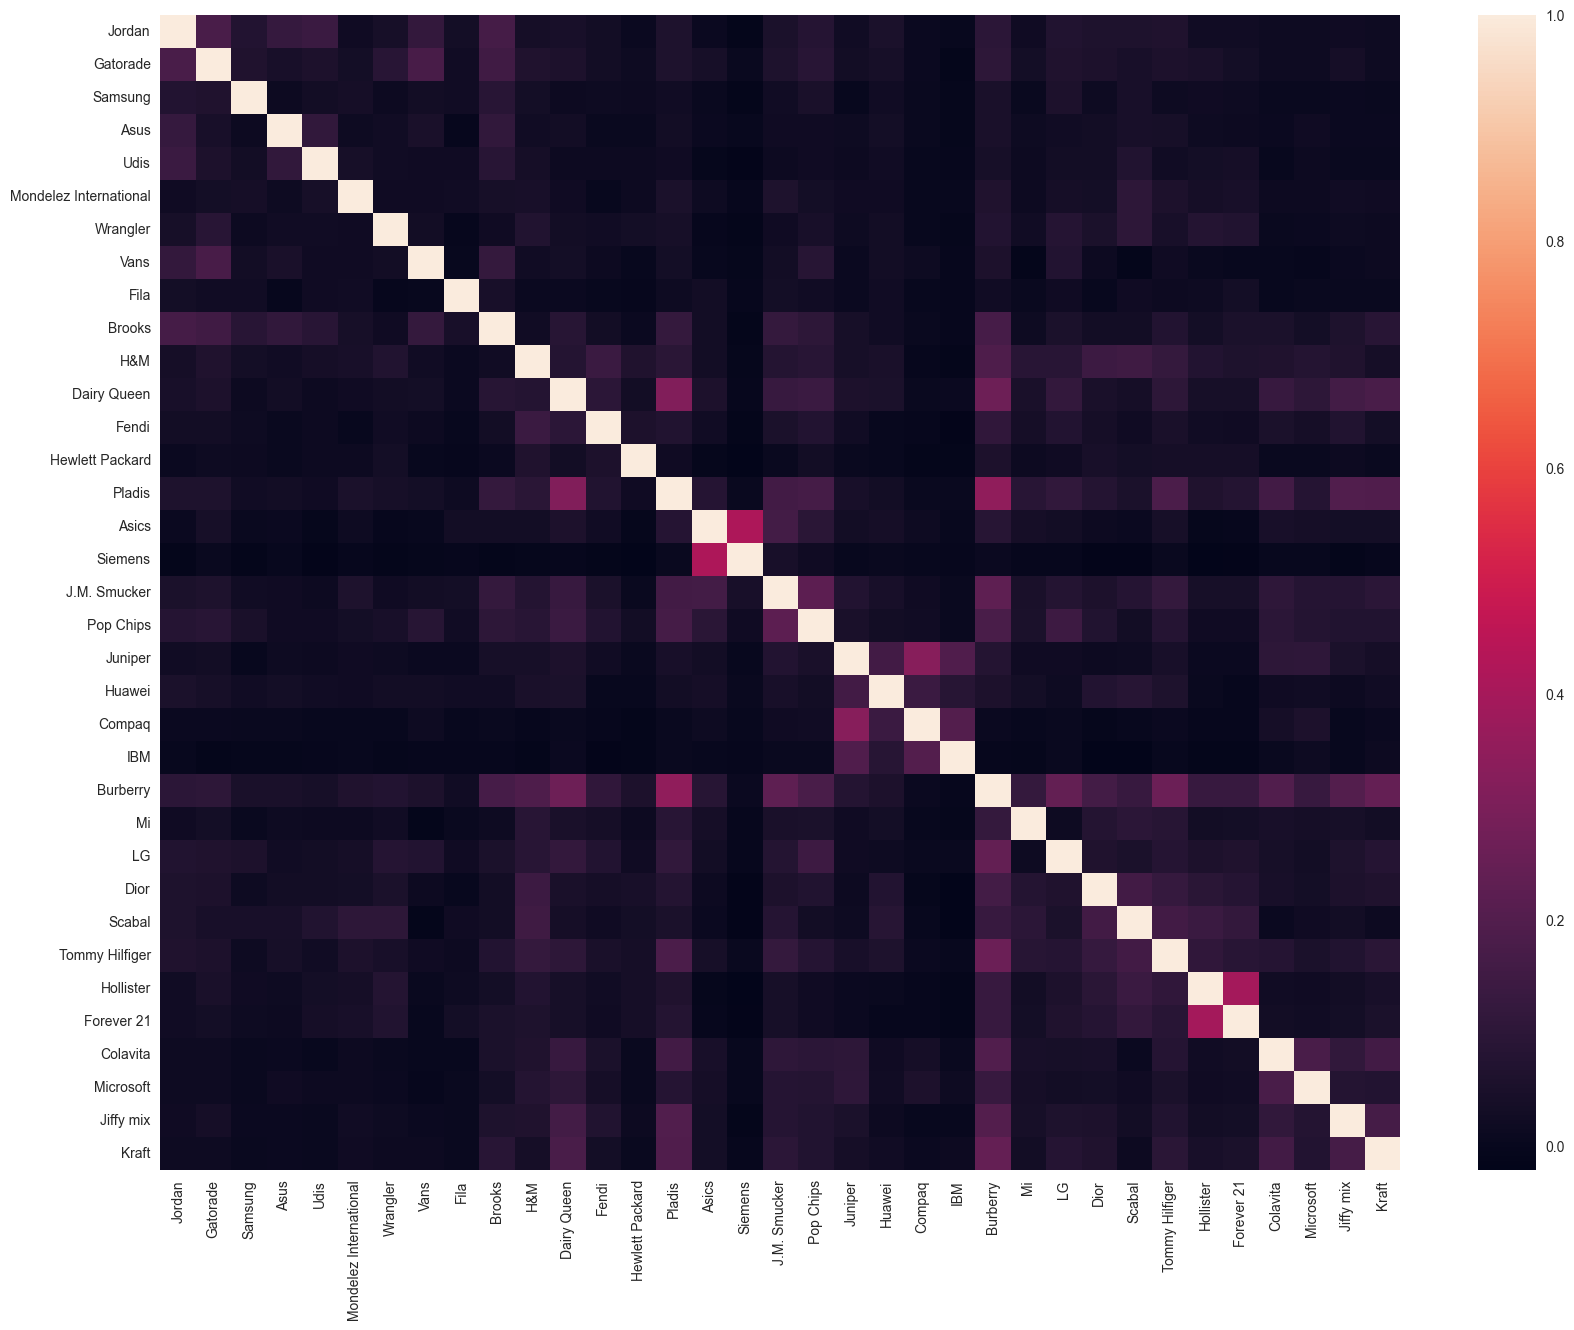

In [35]:
plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,3:].corr())
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

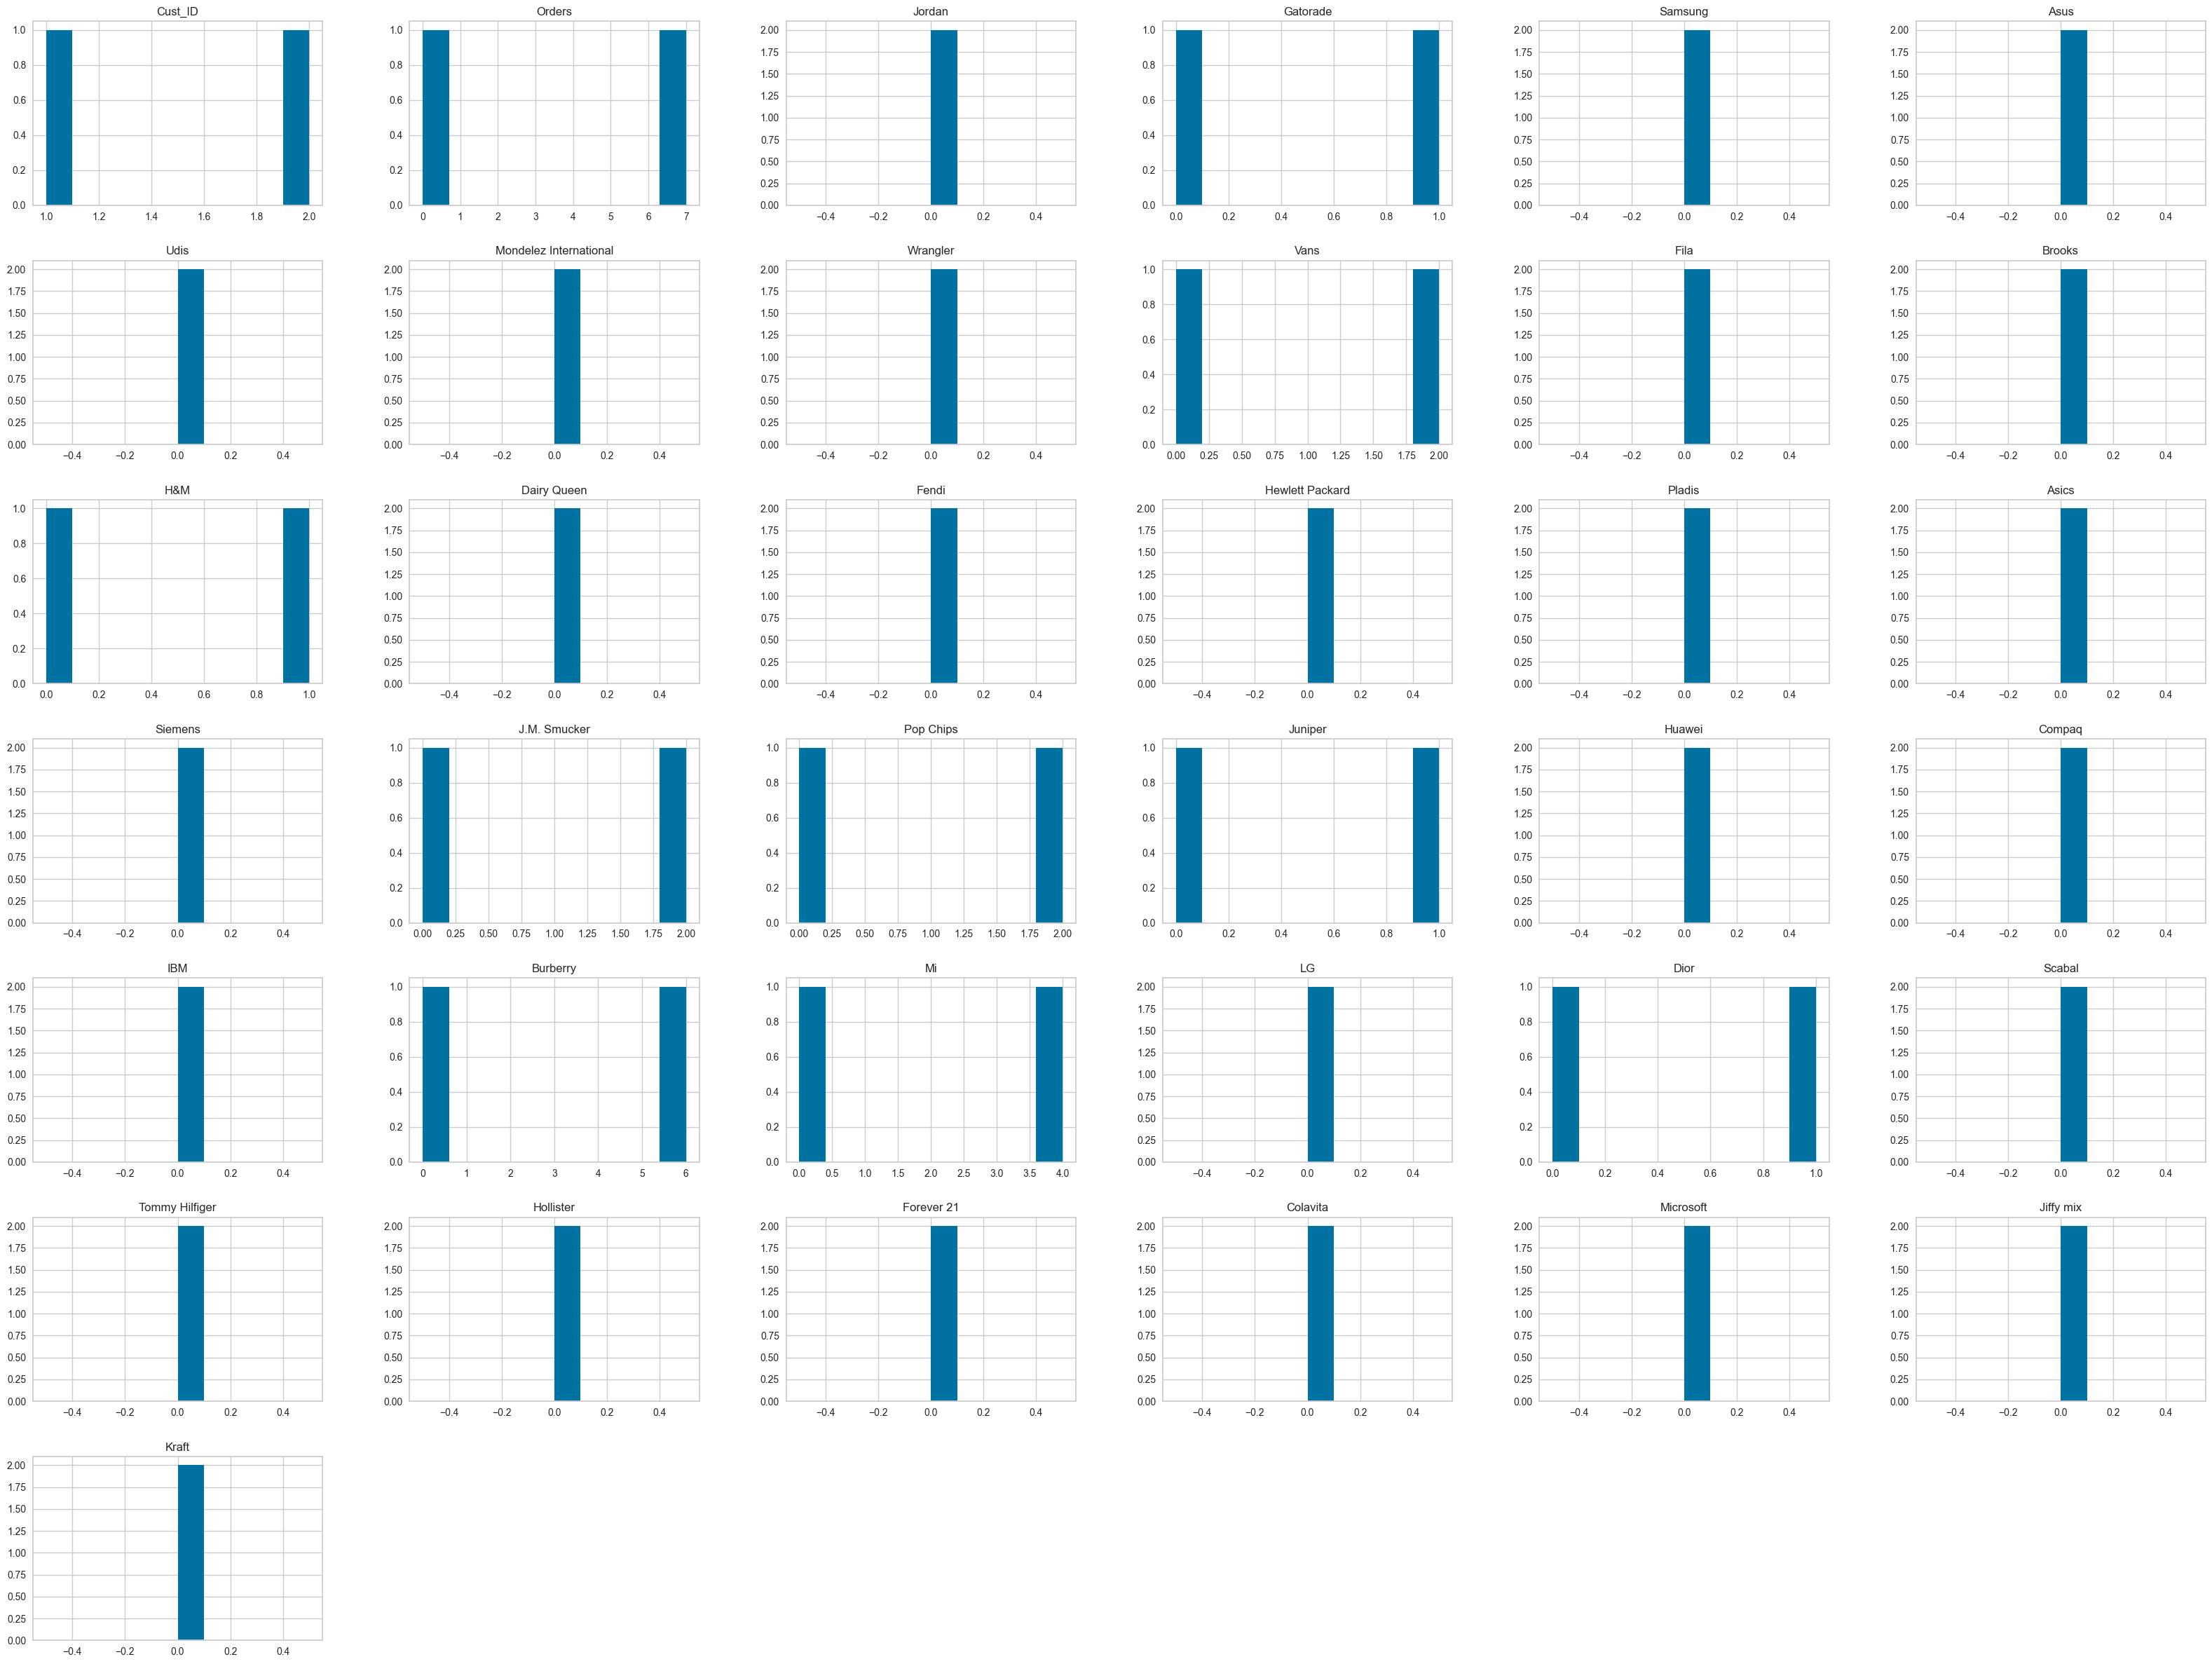

In [36]:
df.iloc[:2,:].hist(figsize=(40,30))
plt.show

In [37]:
new_df=df.copy()
new_df['Total Search']=new_df.iloc[:,3:].sum(axis=1)

In [38]:
new_df.sort_values('Total Search',ascending=False)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
9911,9912,F,2,0,11,0,0,0,0,6,...,2,8,4,9,1,4,1,3,6,160
24365,24366,F,2,3,3,2,2,0,1,2,...,2,2,6,4,1,4,3,3,2,136
4129,4130,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,127
888,889,F,0,2,1,3,2,0,1,3,...,3,1,5,3,2,5,1,3,4,109
15015,15016,F,10,2,2,2,0,0,0,0,...,0,1,0,0,1,7,4,2,2,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,15001,F,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7247,7248,F,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7255,7256,M,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7259,7260,F,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
